In [18]:
# Mengimpor pandas untuk mengelola data dalam bentuk DataFrame
import pandas as pd
# Mengimpor matplotlib.pyplot untuk membuat visualisasi data
import matplotlib.pyplot as plt
# Mengimpor numpy untuk operasi numerik
import numpy as np
# Mengimpor LabelBinarizer dari sklearn untuk mengelola variabel kategori
from sklearn.preprocessing import LabelBinarizer
# Mengimpor KNeighborsClassifier dari sklearn untuk algoritma K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Mengimpor train_test_split untuk memisahkan dataset menjadi pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Mengimpor metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat dataset dari sensus berupa tinggi, berat, dan jenis kelamin nya
sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']
}

# Membuat DataFrame dari data sensus yang dimasukkan ke variable sensus_df
sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


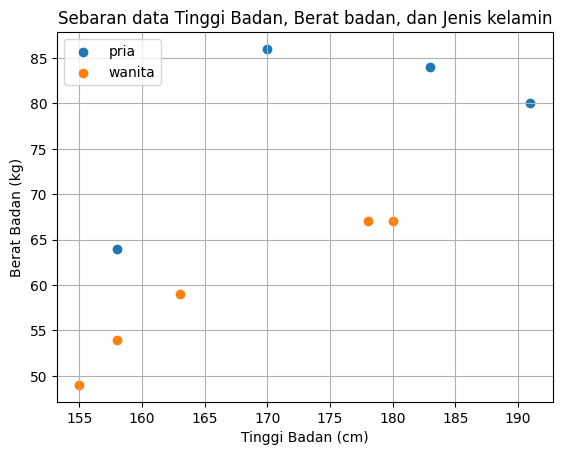

In [47]:
# Membuat visualisasi data dengan scatter plot
# Membuat sebuah gambar (figure) dan sumbu (axis) untuk visualisasi
fig, ax = plt.subplots()

# Memproses data berdasarkan jenis kelamin (jk) dari DataFrame sensus_df
for jk, d in sensus_df.groupby('jk'):
    # Menggunakan scatter plot untuk menampilkan data tinggi dan berat badan
    ax.scatter(d['tinggi'], d['berat'], label=jk)

# Menambahkan legenda (label) pada plot untuk menunjukkan jenis kelamin
plt.legend(loc='upper left')
# Menentukan judul plot
plt.title("Sebaran data Tinggi Badan, Berat badan, dan Jenis kelamin")

# Menentukan label sumbu x dan y
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')

# Menampilkan grid pada plot
plt.grid(True)

# Menampilkan Visualisasi
plt.show()

In [36]:
# Memisahkan dataset menjadi fitur (X) dan target (Y)
X = np.array(sensus_df[['tinggi', 'berat']])
Y = np.array(sensus_df['jk'])

In [37]:
# Inisialisasi objek LabelBinarizer karena jenis kelamin masih dalam bentuk string
lb = LabelBinarizer()
Y = lb.fit_transform(Y).flatten()

In [48]:
# Memisahkan dataset menjadi dataset pelatihan (training) dan pengujian (testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [43]:
# Menentukan jumlah tetangga (K) untuk model K-Nearest Neighbors
K = 3
# Inisialisasi model K-Nearest Neighbors dengan jumlah tetangga K
model = KNeighborsClassifier(n_neighbors=K)
# Melatih model KNN dengan menggunakan data pelatihan
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# Melakukan prediksi jenis kelamin untuk data baru
tinggi_badan = 160
berat_badan = 50
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
Y_new = model.predict(X_new)


In [45]:
# Menggunakan metode inverse_transform dari objek LabelBinarizer (lb) untuk mengembalikan hasil prediksi ke bentuk asli
predicted_gender = lb.inverse_transform(Y_new)
# Menampilkan hasil prediksi
print(f'Hasil prediksi jenis kelamin: {predicted_gender[0]}')

Hasil prediksi jenis kelamin: wanita


In [46]:
# Melakukan prediksi pada dataset pengujian
Y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Menampilkan metrik evaluasi
print(f'Akurasi: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Akurasi: 0.5
Presisi: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666
